In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [49]:
train=pd.read_csv("C://Users/cmejri/Downloads/train.csv")
test=pd.read_csv("C://Users/cmejri/Downloads/test.csv")

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
train['Age']=train.Age.fillna(train['Age'].mean())
test['Age']=test.Age.fillna(test['Age'].mean())

In [54]:
sex={'Sex':{'male':0, 'female':1}}
train.replace(sex, inplace=True)
test.replace(sex, inplace=True)

In [55]:
train_data=train[['Age', 'Sex']]
test_data=test[['Age', 'Sex']]

In [56]:
train_labels=train.Survived
classifier=tree.DecisionTreeClassifier()
classifier.fit(train_data, train_labels)
predicted=classifier.predict(test_data)
print('score: {}'.format(classifier.score(train_data,train_labels)))

score: 0.819304152637486


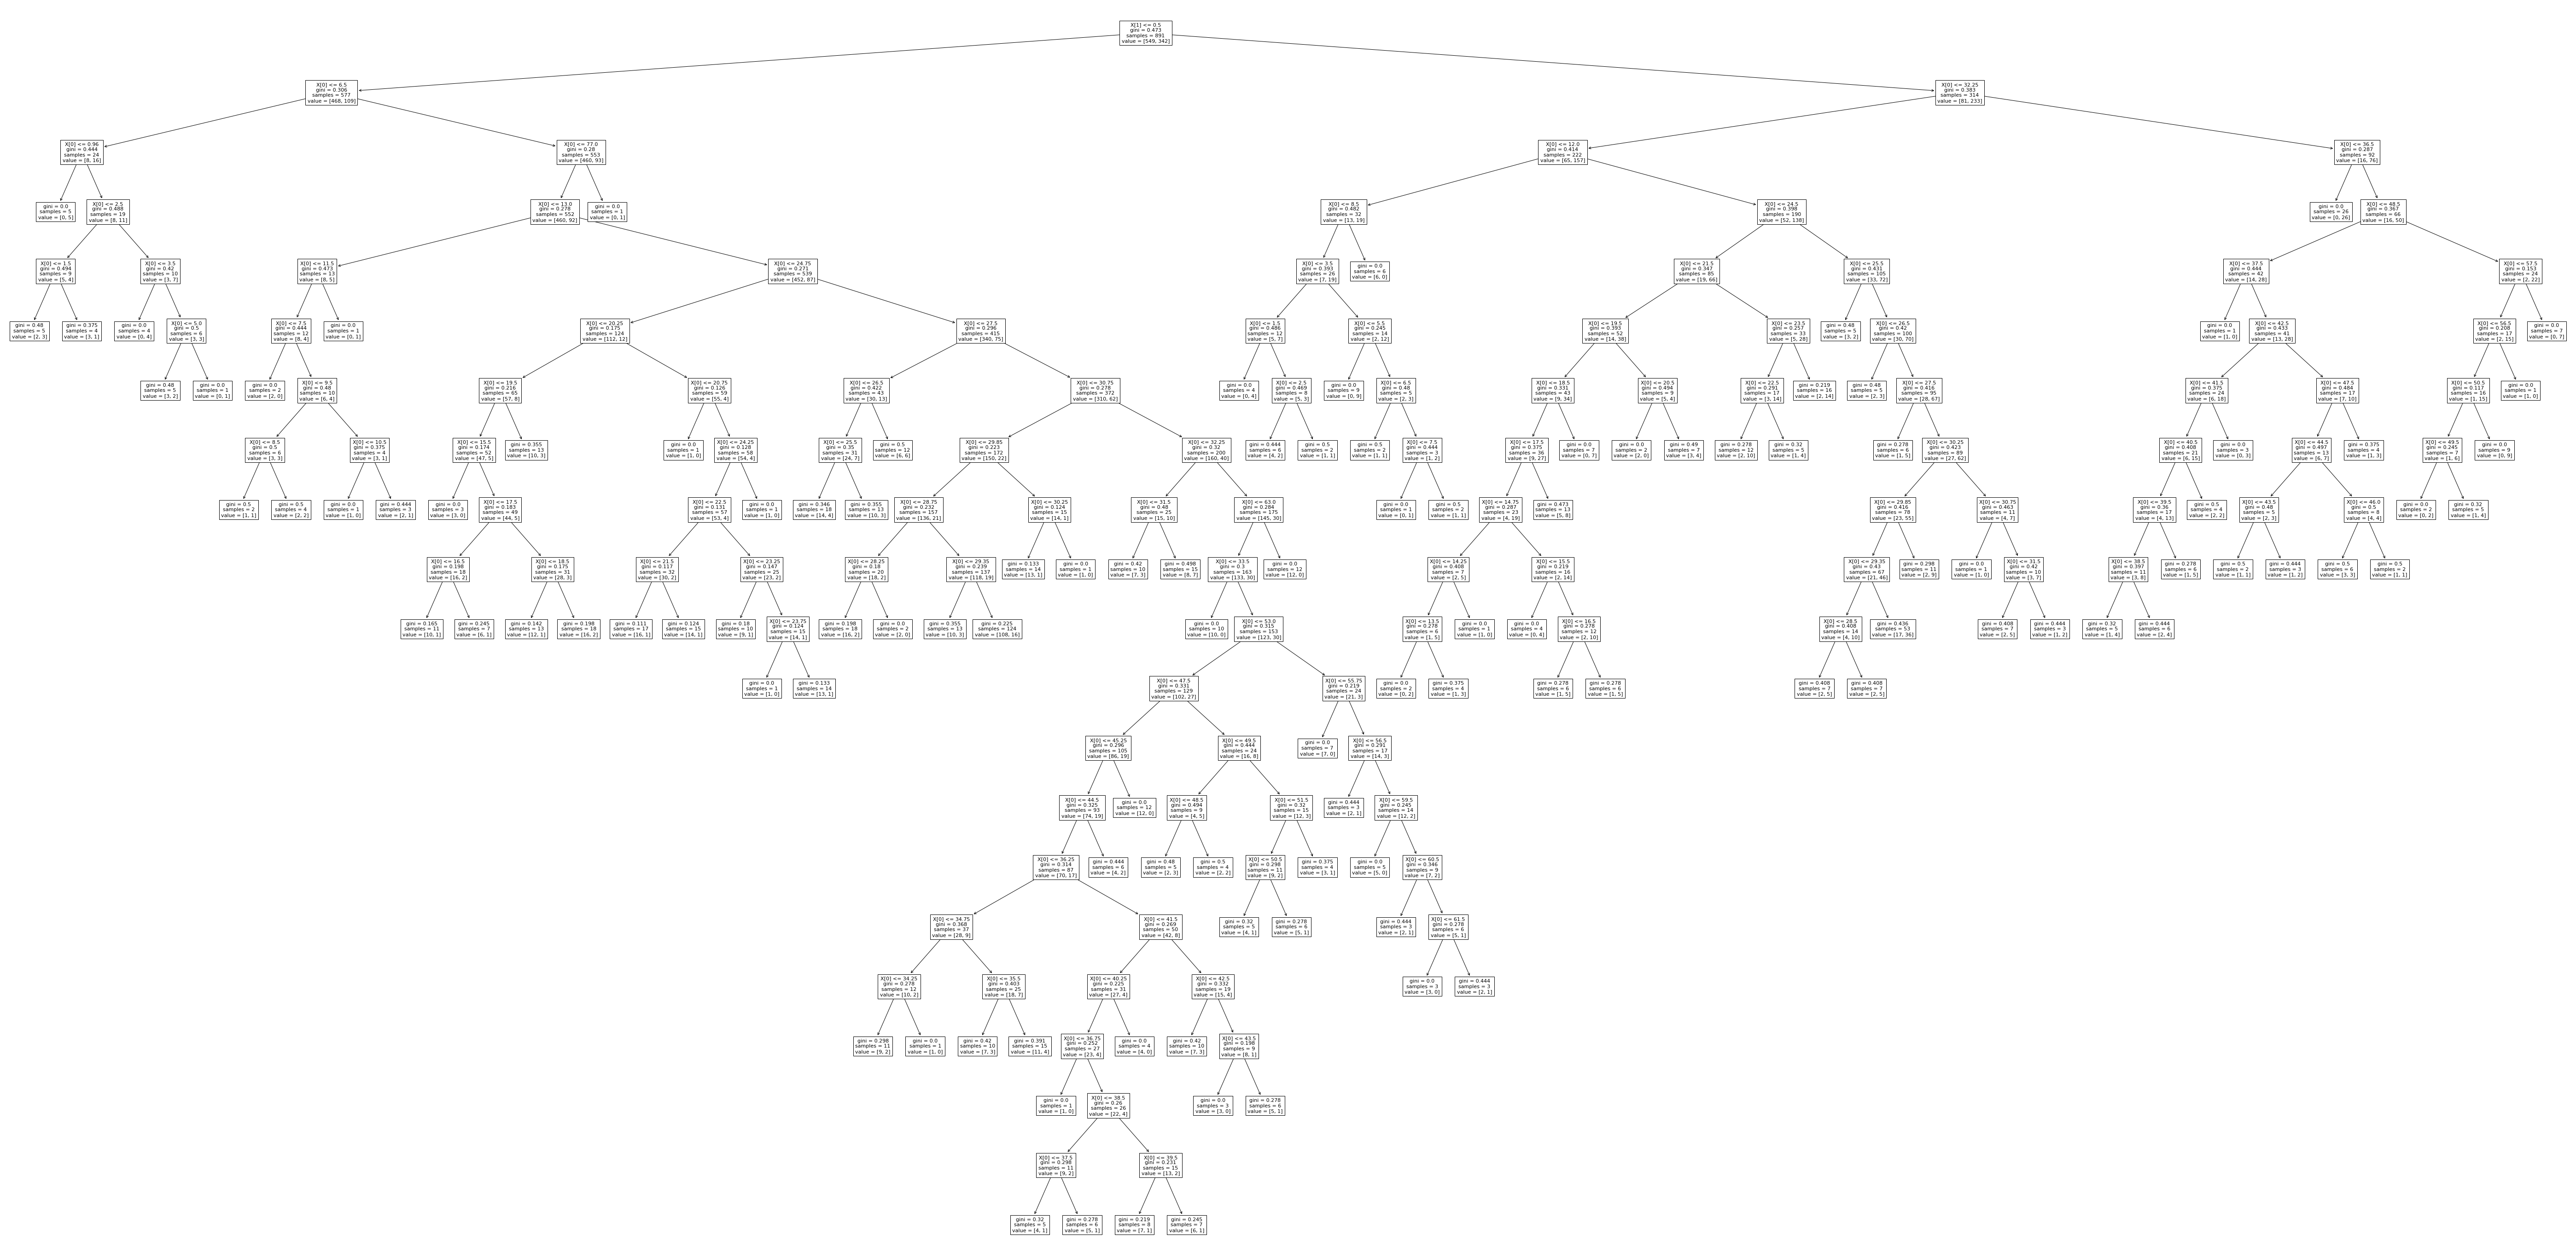

In [72]:
plt.figure(figsize=(100,50))
tree.plot_tree(classifier);

In [77]:
classifier=tree.DecisionTreeClassifier(max_depth=10,random_state = 0)
classifier.fit(train_data, train_labels)
predicted=classifier.predict(test_data)
print('score: {}'.format(classifier.score(train_data,train_labels)))

score: 0.8181818181818182


In [94]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data,train_labels)
print("%.4f" % rf.score(train_data,train_labels))

0.8193


In [96]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_data,train_labels)
predicted=rf.predict(test_data)
print("%.4f" % rf.score(train_data,train_labels))

0.8148
